In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import seaborn as sns

init_notebook_mode(connected=True)
%matplotlib inline

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [3]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_01a0751aff2b43cbaaa8981231b73bf1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Cz6DmT91ZUO7rHUj5HVWG2zVToWtfWlSF0PIl-aIGuvb',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_01a0751aff2b43cbaaa8981231b73bf1.get_object(Bucket='computervision-donotdelete-pr-jhi0fzganqhipq',Key='Demand.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body, encoding = "ISO-8859-1")
df_data_1.head()

,Month DD Raised,No. of FTE Request Raised,SkillList,Location,Experience Grade,Practice,Skill Group,Demand Source
0,May,4,Salesforce (Functional),Bangalore,A4,BANK,(F) IT Operations,Account
1,October,2,"Amazon Web services - Build , Administration a...",Bhubaneswar,B2,M&FT,(F) IT Operations,Account
2,March,2,"Amazon Web services - Build , Administration a...",Pune,A3,TEST,NaN,Support
3,October,1,Test Automation,Bhubaneswar,B2,M&FT,(F) IT Operations,Account
4,June,2,PMO (Account),Noida,A5,I&D,(D) Banking Sector,Proactive


In [5]:
body = client_01a0751aff2b43cbaaa8981231b73bf1.get_object(Bucket='computervision-donotdelete-pr-jhi0fzganqhipq',Key='Demand_v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body, encoding = "ISO-8859-1")
df_data_2.head()

,Region,Employee Code,Last Name,Local Date of Joining,Designation,Status,Market Unit,SkillList,Location
0,US,45149,AALLURI,10/31/2016,CONSULTANT,Billable,BANK,Salesforce (Functional),Bangalore
1,IN,47875,AARATTUKULAM,11/20/2014,SENIOR SOFTWARE ENGINEER,Billable,BANK,"Amazon Web services - Build , Administration a...",Bhubaneswar
2,IN,90386,AASHIK,12/15/2014,ASSOCIATE CONSULTANT,Billable,BANK,"Amazon Web services - Build , Administration a...",Pune
3,IN,41161,Aastha,2/26/2015,ASSOCIATE CONSULTANT,Billable,BANK,Test Automation,Bhubaneswar
4,IN,92293,ABBAN,12/2/2013,CONSULTANT,Billable,BANK,PMO (Account),Noida


In [6]:
df_data_1.shape
df_data_2.shape

(1023, 8)

(10000, 9)

### HeadCount Analysis

In [7]:
%%HTML
<div class='tableauPlaceholder' id='viz1539197061789' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capgem&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='capgem&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capgem&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1539197061789');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.minWidth='420px';vizElement.style.maxWidth='1150px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='1387px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Observations
1. First we can see that the years wise break-up shows that before 2004 the people who are joining have 50% or more than that have chance to end-up on Bench.But after 2004 trends became different.2015 became the Highest when more than 2300 people joined the organization.
2. The Ratio of People on bench to billable is same across all the Location.
3. Designation wise Break shows strange Behaviour where Consultant level jobs have very less people on bench and on Other side manager Level or higher than that level have More number of people on bench.

In [9]:
%%HTML
<div class='tableauPlaceholder' id='viz1539198214225' style='position: relative'><noscript><a href='#'><img alt='Dashboard 2 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capgem&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='capgem&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capgem&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1539198214225');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.minWidth='420px';vizElement.style.maxWidth='1150px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Observations
1. Java,Selenium & Ab initio are top three Skills founded in current working employees.
2. Regions like CN,JP,MY,PH,TW,VN,ZA have No people on Bench and on other side India,US,UK have More number of people on Bench.
3. Banking,Insurance and others Type of Market unit have most number of Emloyees.

## Demand Analysis

In [10]:
%%HTML
<div class='tableauPlaceholder' id='viz1539202125296' style='position: relative'><noscript><a href='#'><img alt='Dashboard 2 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capgem1&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='capgem1&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capgem1&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1539202125296');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.minWidth='420px';vizElement.style.maxWidth='1150px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Observations
1. March Month have Highest demand for Resources and May Month have Least.
2. Skill list wise Java,Ab initio have highest demand but Selenium have less demand than what they have in past.
3. There is new type of skillSet have found in Demand which is not available in currently working employees.

In [11]:
%%HTML
<div class='tableauPlaceholder' id='viz1539271276975' style='position: relative'><noscript><a href='#'><img alt='Dashboard 3 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capgem1&#47;Dashboard3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='capgem1&#47;Dashboard3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capgem1&#47;Dashboard3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1539271276975');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.minWidth='420px';vizElement.style.maxWidth='1250px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='1087px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Observations
1. Here Demand for Test Practice have more than other practices.Banking unit have less demand for people on 2016 than past.
2. There is the Linear relationship between Grade,Month and Location for the demand.
3. March & October having the highest number of Demand raised while December and May Month have the Least.

### Conclusions
1. So two things are clear from this Visualizations that trends before 2004 are different than afterwards.so we can ignore records before 2004 in our model training.
2. While Optimizing the Supply we can Hire less people on Managerial role than the Demand forecasted because there is already People Available on Bench for these Roles.
3. The Linear relationship shows that Grade,Location are not Consider while getting demands for resources.
4. There is Skillset and Market unit difference between Demand year and previous years.

According to problem Statement We Need to Aggregate the records on monthly basis and need to forecast for the next 2 months

In HeadCount datset we have Employees whose date of Joining start from 1984 till 2018.

On other hand we have Demands for 8 months for 2016 year.

In [12]:
##Demand Aggregation
month_agg = df_data_1.groupby(['Month DD Raised'])['No. of FTE Request Raised'].sum().reset_index()

In [13]:
month_agg['Month DD Raised'] = month_agg['Month DD Raised'].apply(lambda x : x[:3])
month_agg['Month DD Raised'] = month_agg['Month DD Raised'].str.capitalize()
month_agg['Month DD Raised'] = pd.to_datetime(month_agg['Month DD Raised'], format='%b', errors='coerce').dt.month
month_agg = month_agg.sort_values(by=['Month DD Raised']).reset_index(drop = True)

In [14]:
month_agg.index = month_agg['Month DD Raised']
month_agg.drop(['Month DD Raised'], axis = 1, inplace = True)

In [15]:
month_agg.head()

,No. of FTE Request Raised
Month DD Raised,
1,217
2,221
3,494
5,141
6,373


In [16]:
##Aggregate the Headcount on monthly Joining basis
df_data_2['Local Date of Joining'] = pd.to_datetime(df_data_2['Local Date of Joining'])
df_data_2['year'] = df_data_2['Local Date of Joining'].dt.year
df_data_2['month'] = df_data_2['Local Date of Joining'].dt.month

In [17]:
df_data_2['Status'].value_counts()

Billable    9604
Bench        396
Name: Status, dtype: int64

In [18]:
df_train = df_data_2[(df_data_2['year'] > 2004) & (df_data_2['year'] < 2016)]
df_test = df_data_2[df_data_2['year'] >= 2016]

In [19]:
df_data_2.shape
df_train.shape
df_test.shape

(10000, 11)

(8590, 11)

(1281, 11)

In [20]:
(df_train['Status'] == "Bench").sum()
(df_test['Status'] == "Bench").sum()

227

66

In [21]:
df_train1 = df_train.groupby(['year', 'month', ])['Status'].count().reset_index()
df_test1 = df_test.groupby(['year', 'month', ])['Status'].count().reset_index()

In [22]:
from datetime import datetime
df_train1['Date'] = df_train1.apply(lambda row: datetime(row['year'], row['month'], 1), axis=1)
df_test1['Date'] = df_test1.apply(lambda row: datetime(row['year'], row['month'], 1), axis=1)

In [23]:
df_train1.head(2)
df_train1.tail(2)
df_test1.head(2)
df_test1.tail(2)
df_train1.shape
df_test1.shape

,year,month,Status,Date
0,2005,1,3,2005-01-01
1,2005,2,2,2005-02-01


,year,month,Status,Date
130,2015,11,28,2015-11-01
131,2015,12,24,2015-12-01


,year,month,Status,Date
0,2016,1,21,2016-01-01
1,2016,2,27,2016-02-01


,year,month,Status,Date
26,2018,3,66,2018-03-01
27,2018,4,20,2018-04-01


(132, 4)

(28, 4)

In [24]:
%%HTML
<div class='tableauPlaceholder' id='viz1539465430741' style='position: relative'><noscript><a href='#'><img alt='Dashboard 3 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capgem&#47;Dashboard3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='capgem&#47;Dashboard3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;capgem&#47;Dashboard3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1539465430741');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.minWidth='420px';vizElement.style.maxWidth='1150px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Observations
After plotting the Aggregate of month of joining for the Current headcount of the Employees.Have found Following patterns.
1. Most number of people have joined on March and August Month.one explanation of that because more demand for resources also found for these two months specifically.
2. Almost same patterns being captured for Designation and Location.
3. These Observations show that the Month on which people have joined the organization have direct relationship with the demand for resources on that particular month.
4. So we can use the month Aggregation of Joining date to predict the demand for the future.


In [25]:
skill_agg = df_data_1.groupby(['Month DD Raised', 'Skill Group'])['No. of FTE Request Raised'].sum().reset_index()
skill_agg['Month DD Raised'] = skill_agg['Month DD Raised'].apply(lambda x : x[:3])
skill_agg['Month DD Raised'] = skill_agg['Month DD Raised'].str.capitalize()
skill_agg['Month DD Raised'] = pd.to_datetime(skill_agg['Month DD Raised'], format='%b', errors='coerce').dt.month
skill_agg = skill_agg.sort_values(by=['Month DD Raised']).reset_index(drop = True)

In [26]:
skill_month_1 = skill_agg[skill_agg['Month DD Raised'] == 1]
skill_month_2 = skill_agg[skill_agg['Month DD Raised'] == 2]
skill_month_3 = skill_agg[skill_agg['Month DD Raised'] == 3]
skill_month_4 = skill_agg[skill_agg['Month DD Raised'] == 5]
skill_month_5 = skill_agg[skill_agg['Month DD Raised'] == 6]
skill_month_6 = skill_agg[skill_agg['Month DD Raised'] == 8]
skill_month_7 = skill_agg[skill_agg['Month DD Raised'] == 10]
skill_month_8 = skill_agg[skill_agg['Month DD Raised'] == 12]

In [27]:
common_skills = list(set(skill_month_1['Skill Group']).intersection(set(skill_month_2['Skill Group'])).intersection(set(skill_month_3['Skill Group'])).intersection(set(skill_month_4['Skill Group'])).intersection(set(skill_month_5['Skill Group'])).intersection(set(skill_month_6['Skill Group'])).intersection(set(skill_month_7['Skill Group'])).intersection(set(skill_month_8['Skill Group'])))

In [28]:
skill_month_1 = skill_month_1.loc[skill_month_1['Skill Group'].isin(common_skills)]
skill_month_2 = skill_month_2.loc[skill_month_2['Skill Group'].isin(common_skills)]
skill_month_3 = skill_month_3.loc[skill_month_3['Skill Group'].isin(common_skills)]
skill_month_4 = skill_month_4.loc[skill_month_4['Skill Group'].isin(common_skills)]
skill_month_5 = skill_month_5.loc[skill_month_5['Skill Group'].isin(common_skills)]
skill_month_6 = skill_month_6.loc[skill_month_6['Skill Group'].isin(common_skills)]
skill_month_7 = skill_month_7.loc[skill_month_7['Skill Group'].isin(common_skills)]
skill_month_8 = skill_month_8.loc[skill_month_8['Skill Group'].isin(common_skills)]

skill_month_1.sort_values(['Skill Group'], inplace = True)
skill_month_2.sort_values(['Skill Group'], inplace = True)
skill_month_3.sort_values(['Skill Group'], inplace = True)
skill_month_4.sort_values(['Skill Group'], inplace = True)
skill_month_5.sort_values(['Skill Group'], inplace = True)
skill_month_6.sort_values(['Skill Group'], inplace = True)
skill_month_7.sort_values(['Skill Group'], inplace = True)
skill_month_8.sort_values(['Skill Group'], inplace = True)

In [29]:
trace0 = go.Scatter(
    x = skill_month_1['Skill Group'],
    y = skill_month_1['No. of FTE Request Raised'],
    mode = 'lines+markers',
    name = 'Jan'
)

trace1 = go.Scatter(
    x = skill_month_2['Skill Group'],
    y = skill_month_2['No. of FTE Request Raised'],
    mode = 'lines+markers',
    name = 'Feb'
)

trace2 = go.Scatter(
    x = skill_month_3['Skill Group'],
    y = skill_month_3['No. of FTE Request Raised'],
    mode = 'lines+markers',
    name = 'Mar'
)

trace3 = go.Scatter(
    x = skill_month_4['Skill Group'],
    y = skill_month_4['No. of FTE Request Raised'],
    mode = 'lines+markers',
    name = 'May'
)

trace4 = go.Scatter(
    x = skill_month_5['Skill Group'],
    y = skill_month_5['No. of FTE Request Raised'],
    mode = 'lines+markers',
    name = 'Jun'
)

trace5 = go.Scatter(
    x = skill_month_6['Skill Group'],
    y = skill_month_6['No. of FTE Request Raised'],
    mode = 'lines+markers',
    name = 'Aug'
)

trace6 = go.Scatter(
    x = skill_month_7['Skill Group'],
    y = skill_month_7['No. of FTE Request Raised'],
    mode = 'lines+markers',
    name = 'Oct'
)

trace7 = go.Scatter(
    x = skill_month_8['Skill Group'],
    y = skill_month_8['No. of FTE Request Raised'],
    mode = 'lines+markers',
    name = 'Dec'
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = dict(title = 'Demand vs Skills Group',
              xaxis = dict(title = 'Skills Group'),
              yaxis = dict(title = 'Demand'),
              )
fig = dict(data=data, layout=layout)
iplot(fig)

In [30]:
trace0 = go.Scatter(
    x = df_train1['Date'],
    y = df_train1['Status'],
    mode = 'lines+markers',
    name = 'Account'
)
data = [trace0]

layout = dict(title = 'DOJ over period of Time',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Count'),
              )
fig = dict(data=data, layout=layout)
iplot(fig)

In [31]:
# df_train2 = df_train1.reset_index()
df_train1.index = df_train1['Date']
df_train1.drop(['year','month','Date'], axis = 1, inplace = True)
df_train1.tail()

,Status
Date,
2015-08-01,311
2015-09-01,163
2015-10-01,49
2015-11-01,28
2015-12-01,24


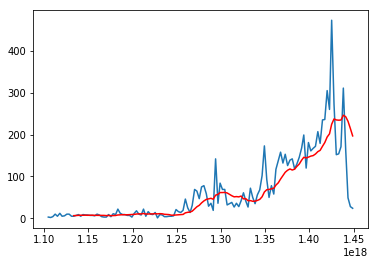

In [32]:
moving_avg = pd.rolling_mean(df_train1,12)
plt.plot(df_train1)
plt.plot(moving_avg, color='red')

To Check the Stationarity of the Time Series Lets find out there mean and standard deviation change over Period of time.

In [33]:
##Perform Dickey-Fuller test:
def test_stationarity(timeseries):
    plt.figure(figsize=(50, 8))
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=3)
    rolstd = pd.rolling_std(timeseries, window=3)
    
    trace0 = go.Scatter(
    x = pd.Series(range(len(timeseries))),
    y = pd.Series(timeseries['Status']).reset_index(drop = True),
    mode = 'lines+markers',
    name = 'Original'
    )
    
    trace1 = go.Scatter(
    x = pd.Series(range(len(rolmean))),
    y = pd.Series(rolmean['Status']).reset_index(drop = True),
    mode = 'lines+markers',
    name = 'Rolling Mean'
    )
        
    trace2 = go.Scatter(
    x = pd.Series(range(len(rolstd))),
    y = pd.Series(rolstd['Status']).reset_index(drop = True),
    mode = 'lines+markers',
    name = 'Rolling Std'
    )
    
    data = [trace0, trace1,trace2]
    layout = dict(title = 'Rolling Mean',
              xaxis = dict(title = 'month no.'),
              yaxis = dict(title = 'Demand'),
              width=1000,
              height=500,
              )
    fig = dict(data=data, layout=layout)
    iplot(fig)
    
    print('Results of Dickey-Fuller Test:')
    dftest = sm.tsa.adfuller(timeseries['Status'], maxlag = 3, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(df_train1)

Results of Dickey-Fuller Test:
Test Statistic                  -1.748706
p-value                          0.406209
#Lags Used                       3.000000
Number of Observations Used    128.000000
Critical Value (5%)             -2.884398
Critical Value (1%)             -3.482501
Critical Value (10%)            -2.578960
dtype: float64


In [34]:
rolstd = pd.rolling_std(df_train1, window=3)
rolstd.fillna(0,inplace=True)

### Metric Used
RMSE and r2_score has been used to check the performance of the model. Lower Rmse and higher r2_score indicates better model performance

In [35]:
rms = sqrt(mean_squared_error(df_train1.Status, rolstd.Status))
# rms = r2_score( df_train1.Status,rolstd.Status)
print(rms)

82.4815783022354


In [36]:
df_train2 = df_train1.copy()
df_train2.index = pd.DatetimeIndex(freq = 'm', start='2005-01-01', periods=132)
# df_train2.head()

In [37]:
##Decompose the signal into trend,seasonality and Residual
decomposition = sm.tsa.seasonal_decompose(df_train2, model='multiplicative',freq = 3)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.rcParams['figure.figsize'] = 30, 20

trace0 = go.Scatter(
    x = pd.Series(range(len(df_train2))),
    y = df_train2['Status'],
    mode = 'lines+markers',
    name = 'Observed'
)
data = [trace0]
layout = dict(title = 'Observed = Trend + Seasonality + Residuals',
              xaxis = dict(title = 'month no.'),
              yaxis = dict(title = 'Joined'),
              width=1100,
              height=300,
              )
fig = dict(data=data, layout=layout)
iplot(fig)

trace0 = go.Scatter(
    x = pd.Series(range(len(trend))),
    y = pd.Series(trend['Status']).reset_index(drop = True),
    mode = 'lines+markers',
    name = 'Trend'
)
data = [trace0]
layout = dict(title = 'Trend',
              xaxis = dict(title = 'month no.'),
              yaxis = dict(title = 'Joined'),
              width=1100,
              height=300,
              )
fig = dict(data=data, layout=layout)
iplot(fig)

trace0 = go.Scatter(
    x = pd.Series(range(len(seasonal))),
    y = pd.Series(seasonal['Status']).reset_index(drop = True),
    mode = 'lines+markers',
    name = 'Seasonality'
)
data = [trace0]
layout = dict(title = 'Seasonality',
              xaxis = dict(title = 'month no.'),
              yaxis = dict(title = 'Joined'),
              width=1100,
              height=300,
              )
fig = dict(data=data, layout=layout)
iplot(fig)

trace0 = go.Scatter(
    x = pd.Series(range(len(residual))),
    y = pd.Series(residual['Status']).reset_index(drop = True),
    mode = 'lines+markers',
    name = 'Residuals'
)
data = [trace0]
layout = dict(title = 'Residuals',
              xaxis = dict(title = 'month no.'),
              yaxis = dict(title = 'Joined'),
              width=1100,
              height=300,
              )
fig = dict(data=data, layout=layout)
iplot(fig)

In [38]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

Results of Dickey-Fuller Test:
Test Statistic                -9.467730e+00
p-value                        4.185985e-16
#Lags Used                     3.000000e+00
Number of Observations Used    1.260000e+02
Critical Value (5%)           -2.884766e+00
Critical Value (1%)           -3.483346e+00
Critical Value (10%)          -2.579156e+00
dtype: float64


The Dickey-Fuller test statistic is significantly lower than the 1% critical value.

In [39]:
from statsmodels.tsa.arima_model import ARIMA

In [40]:
ts_log_diff = df_train1 - df_train1.shift()

In [41]:
df_train1['Status'] = df_train1['Status'].astype('float32')

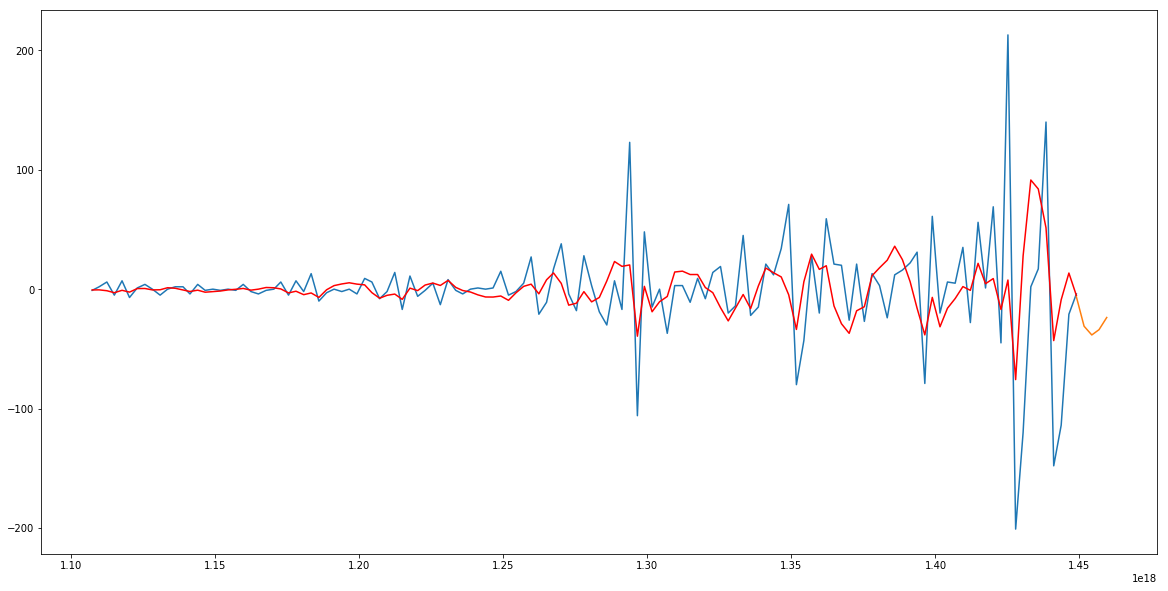

In [42]:
model = ARIMA(df_train1, order=(2, 1, 2))  
results_ARIMA = model.fit()
plt.figure(figsize=(20,10))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
# results_ARIMA.predict()
preds1 = results_ARIMA.predict(start="2015-12-01", end="2016-04-01", dynamic=True)
plt.plot(preds1)

In [43]:
rms = sqrt(mean_squared_error(ts_log_diff.Status[1:], results_ARIMA.fittedvalues))
r2_scr = r2_score(ts_log_diff.Status[1:], results_ARIMA.fittedvalues)
print(rms)
print(r2_scr)

38.57204385871981
0.204564300148


The Root Mean Square Error between Actual and Predicted value have been improved.lets try Prophet By Facebook which can handle Trends and Seasonality Better than Arima.

In [44]:
!pip install fbprophet

Requirement not upgraded as not directly required: Cython>=0.22 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from fbprophet)
    100% |████████████████████████████████| 50.0MB 20kB/s  eta 0:00:01
Requirement not upgraded as not directly required: numpy>=1.10.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from fbprophet)
Requirement not upgraded as not directly required: pandas>=0.20.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from fbprophet)
Requirement not upgraded as not directly required: matplotlib>=2.0.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from fbprophet)
Requirement not upgraded as not directly required: python-dateutil>=2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pandas>=0.20.1->fbprophet)
Requirement not upgraded as not directly required: pytz>=2011k in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pandas>=0.20.1->fbprophet)
Requirement not upgraded as not direct

In [63]:
from fbprophet import Prophet
sns.set(font_scale=1) 
df_date_index = df_train1.reset_index()

In [64]:
df_date_index.columns = ['date', 'demand']

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


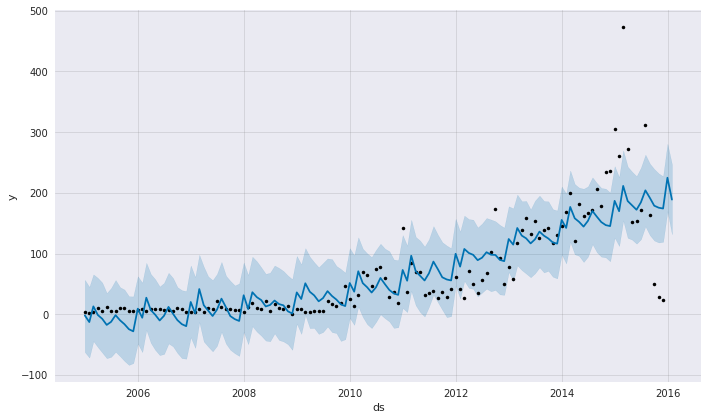

In [65]:
df_date_index = df_date_index.set_index('date')
df_prophet = df_date_index.copy()
df_prophet.reset_index(drop=False,inplace=True)
df_prophet.columns = ['ds','y']

m = Prophet()
m.fit(df_prophet)
##make Forecast for next 2 months.
future = m.make_future_dataframe(periods=2,freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

1. Three Values are important which we get from Prophet Forecasting.yhat_lower & yhat_upper will gave you the range of interval for the forecast.
2. Trend will gave you the actual predicted value.

In [66]:
forecast[['ds','trend','yhat_lower','yhat_upper']].tail()

,ds,trend,yhat_lower,yhat_upper
129,2015-10-01,191.823465,121.453769,239.139732
130,2015-11-01,194.353398,118.194877,231.869162
131,2015-12-01,196.801720,119.338278,227.297695
132,2015-12-31,199.250043,169.787098,280.773637
133,2016-01-31,201.779976,131.584238,246.890739


In [67]:
rms = sqrt(mean_squared_error(df_train1.Status, forecast['trend'][:132]))
r2_scr = r2_score(df_train1.Status, forecast['trend'][:132])
print(rms)
print(r2_scr)

47.82042272741979
0.649525226773


In [68]:
rms = sqrt(mean_squared_error(month_agg['No. of FTE Request Raised'][:2], forecast['trend'][132:]))
print(rms)

18.499598938222338


In [70]:
forecast['trend'][132:]
month_agg['No. of FTE Request Raised'][:2]

132    199.250043
133    201.779976
Name: trend, dtype: float64

Month DD Raised
1    217
2    221
Name: No. of FTE Request Raised, dtype: int64

## Results
1. Train r2_score is 65% and Rmse is 47.82.
2. Test r2_score is 85% and Rmse is 18.50.

### Constraints and Assumptions
Annual Bench budget consumption = $3.288 Mn => 400 * 685 * 12

Maximum bench resources can be = $5,76 Mn => 5760000/12*685 = 700

So,the total bench strength is 400 in the year beggining and it can goes upto 700 till the year end.


### Budget & Maximum Limit

1. Total headcount at the beginning of the year is 10000 and cannot exceed 12000 at the end of the year

2. Assume Average annual attrition of 20% of total headcount

3. So,the maximum number of people can be hired on 2018 are 12000 - (10000 - 20% of 10000) = 4000

4. Maximum 4000 new resources can be hired including maximum 700 bench resource included.

### Analysis & Supply Optimization
1. As we seen in our above analysis that months march and august have the highest number of resource demand.

2. So,we can take the yhat_upper for these months

3. For the Months of febuary,June & December in past the resource demand was less

4. So,we can take yhat_lower for these three months

5. For other months taking the actual trend value.

6. so we can take the average of the 2 forecasted months and plan for next 12 months

7. Average for 2 months will be 200 and the total number of resources for 12 months can be astimated to 12 * 200 = 2400.

We have predicted the demand for the 2016 year will be 2400 but actual it was 2540.So,our Calculation is less than 140 Resources from the actual value.

So Opportunity Loss occur because of demand exceed supply is 140 * 900 = $0.126 Mn.